<a href="https://colab.research.google.com/github/romefeller/predictive/blob/main/notebooks/MultiLinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

df = pd.read_csv("sample_data/california_housing_test.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [10]:
import pymc as pm

median_income = df['median_income'].values
housing_median_age = df['housing_median_age'].values
median_house_value = df['median_house_value'].values

with pm.Model() as multi_linreg:

    alpha = pm.Normal('alpha', 0, 100)
    beta_income = pm.Normal('beta_income', 0, 10)
    beta_age = pm.Normal('beta_age', 0, 10)
    sigma = pm.HalfNormal('sigma', 1)

    mu = alpha + beta_income * median_income + beta_age * housing_median_age

    Y_obs = pm.Normal('Y_obs', mu, sigma, observed=median_house_value)

In [11]:
with multi_linreg:
  prior_trace = pm.sample_prior_predictive()

In [17]:
prior_trace

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data

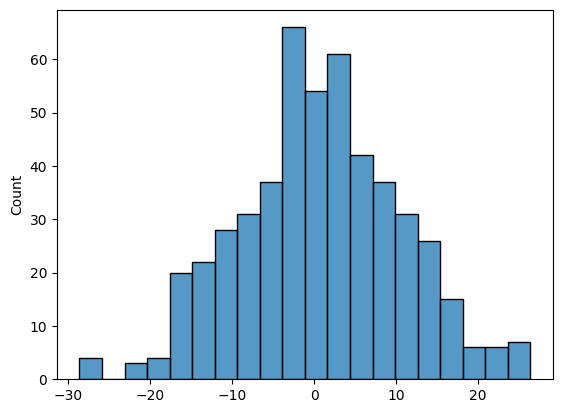

In [15]:
import seaborn as sns

sns.histplot(prior_trace.prior['beta_income'].values.flatten(), bins=20)

<Axes: ylabel='Count'>

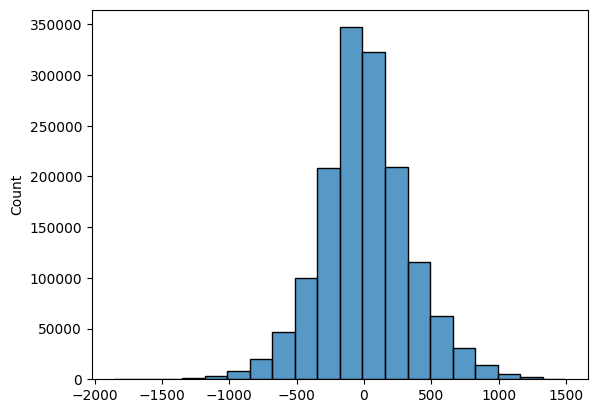

In [18]:
sns.histplot(prior_trace.prior_predictive['Y_obs'].values.flatten(), bins=20)

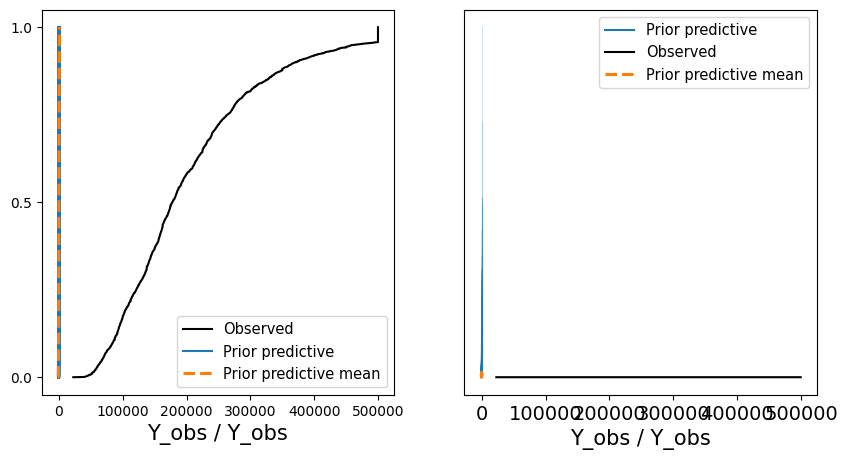

In [31]:
import arviz as az
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(prior_trace, group='prior', kind='cumulative',ax=axes[0]);
az.plot_ppc(prior_trace, group='prior',ax=axes[1]);

In [22]:
with multi_linreg:
  trace = pm.sample()

pm.summary(trace)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,69379.357,77.214,69230.966,69516.982,2.457,1.738,989.0,1045.0,1.0
beta_income,8885.370,9.414,8868.531,8903.572,0.273,0.193,1203.0,1084.0,1.0
beta_age,3092.438,2.591,3087.463,3097.105,0.079,0.056,1073.0,1027.0,1.0
sigma,2410.327,0.511,2409.298,2411.242,0.015,0.010,1186.0,913.0,1.0


In [24]:
with multi_linreg:
    trace_post = pm.sample_posterior_predictive(trace)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


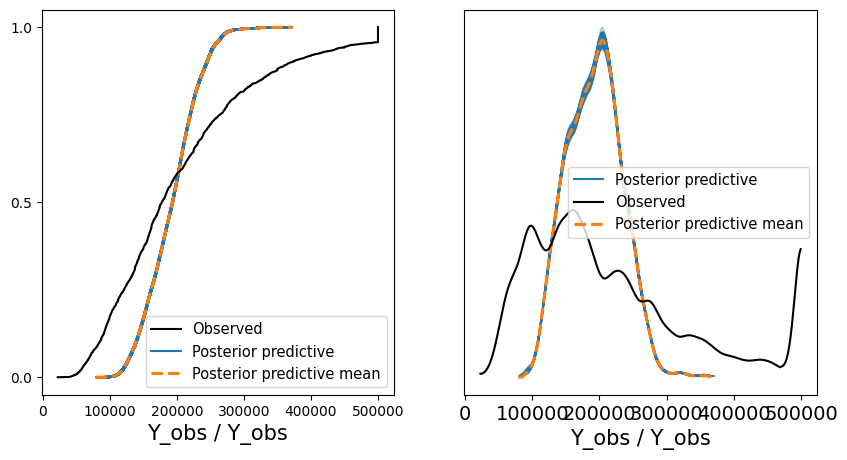

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_post, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_post, group='posterior', ax=axes[1])

In [32]:
population = df['population'].values
with pm.Model() as multi_linreg_pop:

    alpha = pm.Normal('alpha', 0, 100)
    beta_income = pm.Normal('beta_income', 0, 10)
    beta_age = pm.Normal('beta_age', 0, 10)
    beta_pop = pm.Normal('beta_pop', 0, 10)
    sigma = pm.HalfNormal('sigma', 1)

    mu = alpha + beta_income * median_income + beta_age * housing_median_age + beta_pop * population

    Y_obs = pm.Normal('Y_obs', mu, sigma, observed=median_house_value)

In [45]:
with multi_linreg_pop:
  trace_pop = pm.sample()

pm.summary(trace_pop)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,48974.491,82.739,48820.418,49128.959,2.168,1.533,1456.0,984.0,1.0
beta_income,8127.514,9.367,8110.203,8144.137,0.319,0.225,864.0,832.0,1.0
beta_age,2933.534,2.676,2928.332,2938.174,0.070,0.050,1456.0,1176.0,1.0
beta_pop,22.672,0.038,22.594,22.740,0.001,0.001,1498.0,1336.0,1.0
sigma,2413.142,0.531,2412.166,2414.140,0.017,0.012,956.0,811.0,1.0


In [36]:
with multi_linreg_pop:
    trace_post_pop = pm.sample_posterior_predictive(trace_pop)

array([<Axes: xlabel='Y_obs / Y_obs'>], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


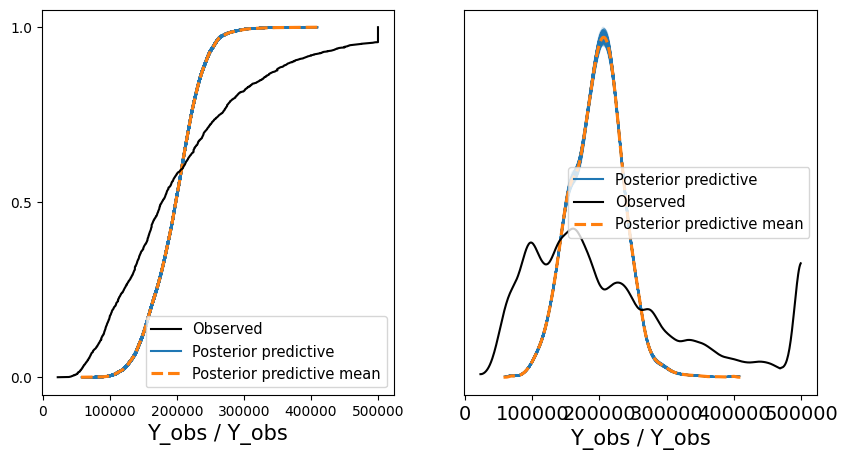

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_post_pop, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_post_pop, group='posterior', ax=axes[1])

In [42]:
with pm.Model() as multi_linreg_pop_t:

    alpha = pm.Normal('alpha', 0, 100)
    beta_income = pm.Normal('beta_income', 0, 10)
    beta_age = pm.Normal('beta_age', 0, 10)
    beta_pop = pm.Normal('beta_pop', 0, 10)
    sigma = pm.HalfNormal('sigma', 1)

    mu = alpha + beta_income * median_income + beta_age * housing_median_age + beta_pop * population
    df = pm.Exponential("df",1)
    Y_obs = pm.StudentT('Y_obs', nu=df, mu=mu, sigma=sigma, observed=median_house_value)

In [44]:
with multi_linreg_pop_t:
  trace_p = pm.sample()

pm.summary(trace_p)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,137.905,123.005,-98.297,355.888,46.862,34.650,7.0,62.0,1.22
beta_income,2.618,10.980,-16.758,23.258,2.900,2.094,14.0,524.0,1.11
beta_age,44.415,25.567,1.378,74.452,16.915,13.943,3.0,19.0,1.93
beta_pop,63.138,11.202,54.500,83.383,7.637,6.370,3.0,17.0,2.18
sigma,17.555,0.727,16.220,18.943,0.028,0.020,671.0,896.0,1.01
df,0.103,0.002,0.099,0.107,0.001,0.000,12.0,151.0,1.13


In [ ]:
with multi_linreg_pop_t:
    trace_post_t = pm.sample_posterior_predictive(trace_p)

In [46]:
with multi_linreg_pop:
    pm.compute_log_likelihood(trace_pop)

with multi_linreg:
    pm.compute_log_likelihood(trace)

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1037: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likel

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

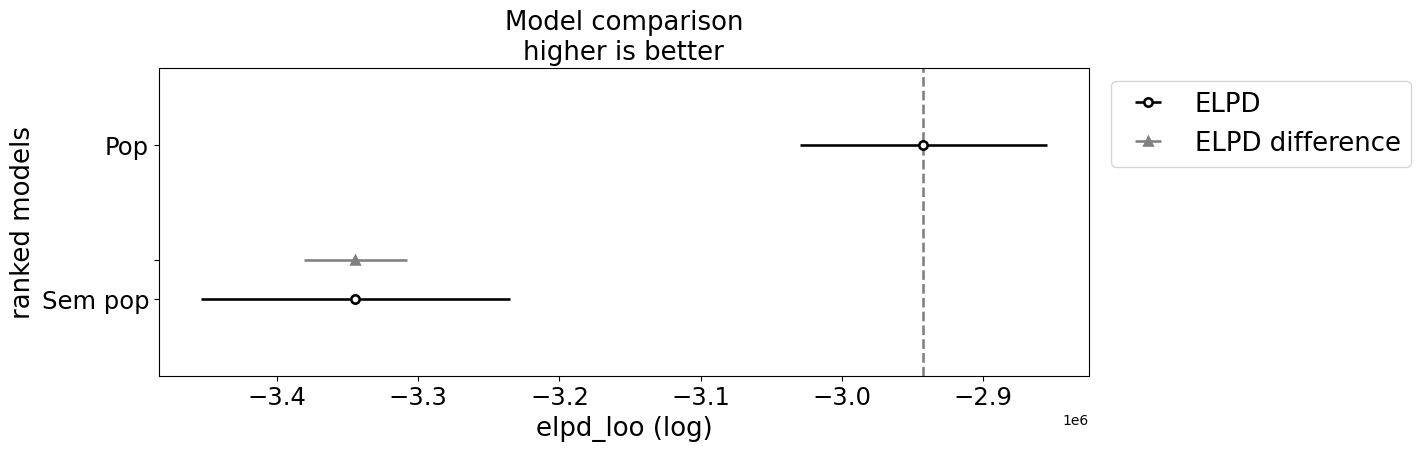

In [47]:
model_compare = az.compare(
    {
        "Pop": trace_pop,
        "Sem pop": trace,
    }, method='BB-pseudo-BMA'
)
az.plot_compare(model_compare, figsize=(12, 4), insample_dev=False)

In [48]:
model_compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Pop,0,-2.942420e+06,6640.166221,0.000000,1.0,87161.220226,0.000000,True,log
Sem pop,1,-3.344321e+06,7190.165466,401901.665719,0.0,109190.137738,36312.756956,True,log


In [56]:
df_test = pd.read_csv('sample_data/california_housing_test.csv')

In [58]:
population_test = df_test['population'].values
median_income_test = df_test['median_income'].values
housing_median_age_test = df_test['housing_median_age'].values


In [63]:
with multi_linreg_pop:
  p_m = pm.MutableData('p_m', population)
  m_m = pm.MutableData('m_m', median_income)
  h_m = pm.MutableData('h_m', housing_median_age)

In [64]:
with multi_linreg_pop:
  trace_p_mutable = pm.sample()

In [ ]:
with multi_linreg_pop:

    pm.set_data({
        "p_m": population_test,
        "m_m": median_income_test,
        "h_m": housing_median_age_test})

In [65]:
with multi_linreg_pop:
    ppc = pm.sample_posterior_predictive(trace_p_mutable)

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

median_house_value_test = df_test['median_house_value'].values

median_house_predictive = ppc.posterior_predictive["Y_obs"]["Y_obs_dim_2"]

mae = mean_absolute_error(median_house_value_test, median_house_predictive)
rmse = mean_squared_error(median_house_value_test, median_house_predictive, squared=False)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 204346.775
RMSE: 233553.55829724582
